In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline
rcParams['figure.figsize'] = 11, 5

import warnings
warnings.simplefilter('ignore')

In [51]:
bc_df = pd.read_csv('data/breast_cancer.csv', index_col=['id'])
print(bc_df.info())
bc_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [52]:
features = bc_df[bc_df.columns[1:-1]] #features or variables used to predict diagnosis
diagnosis = bc_df[['diagnosis']] #predicted variables 
diagnosis['count'] = 1 #create a column of 1s to get counts


### Display Distributions

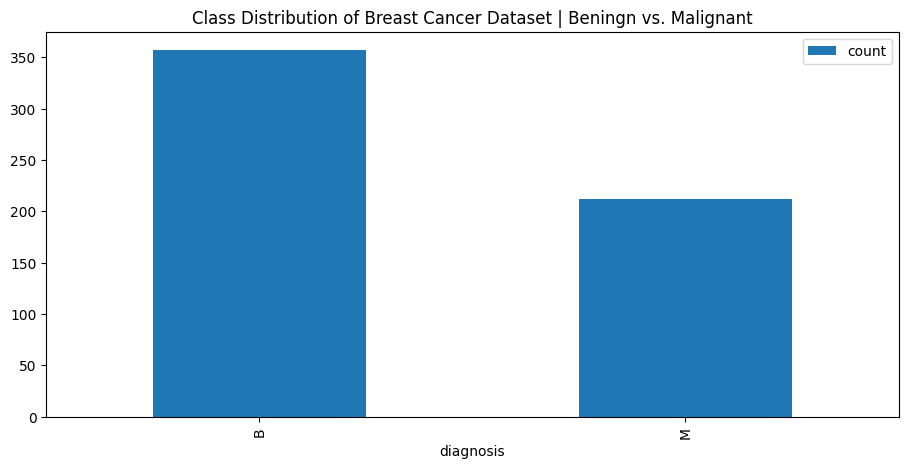

In [145]:
diagnosis[['count', 'diagnosis']].groupby(['diagnosis']).count().plot(kind='bar')
plt.title('Class Distribution of Breast Cancer Dataset | Beningn vs. Malignant')
plt.show()

### Data Distributions

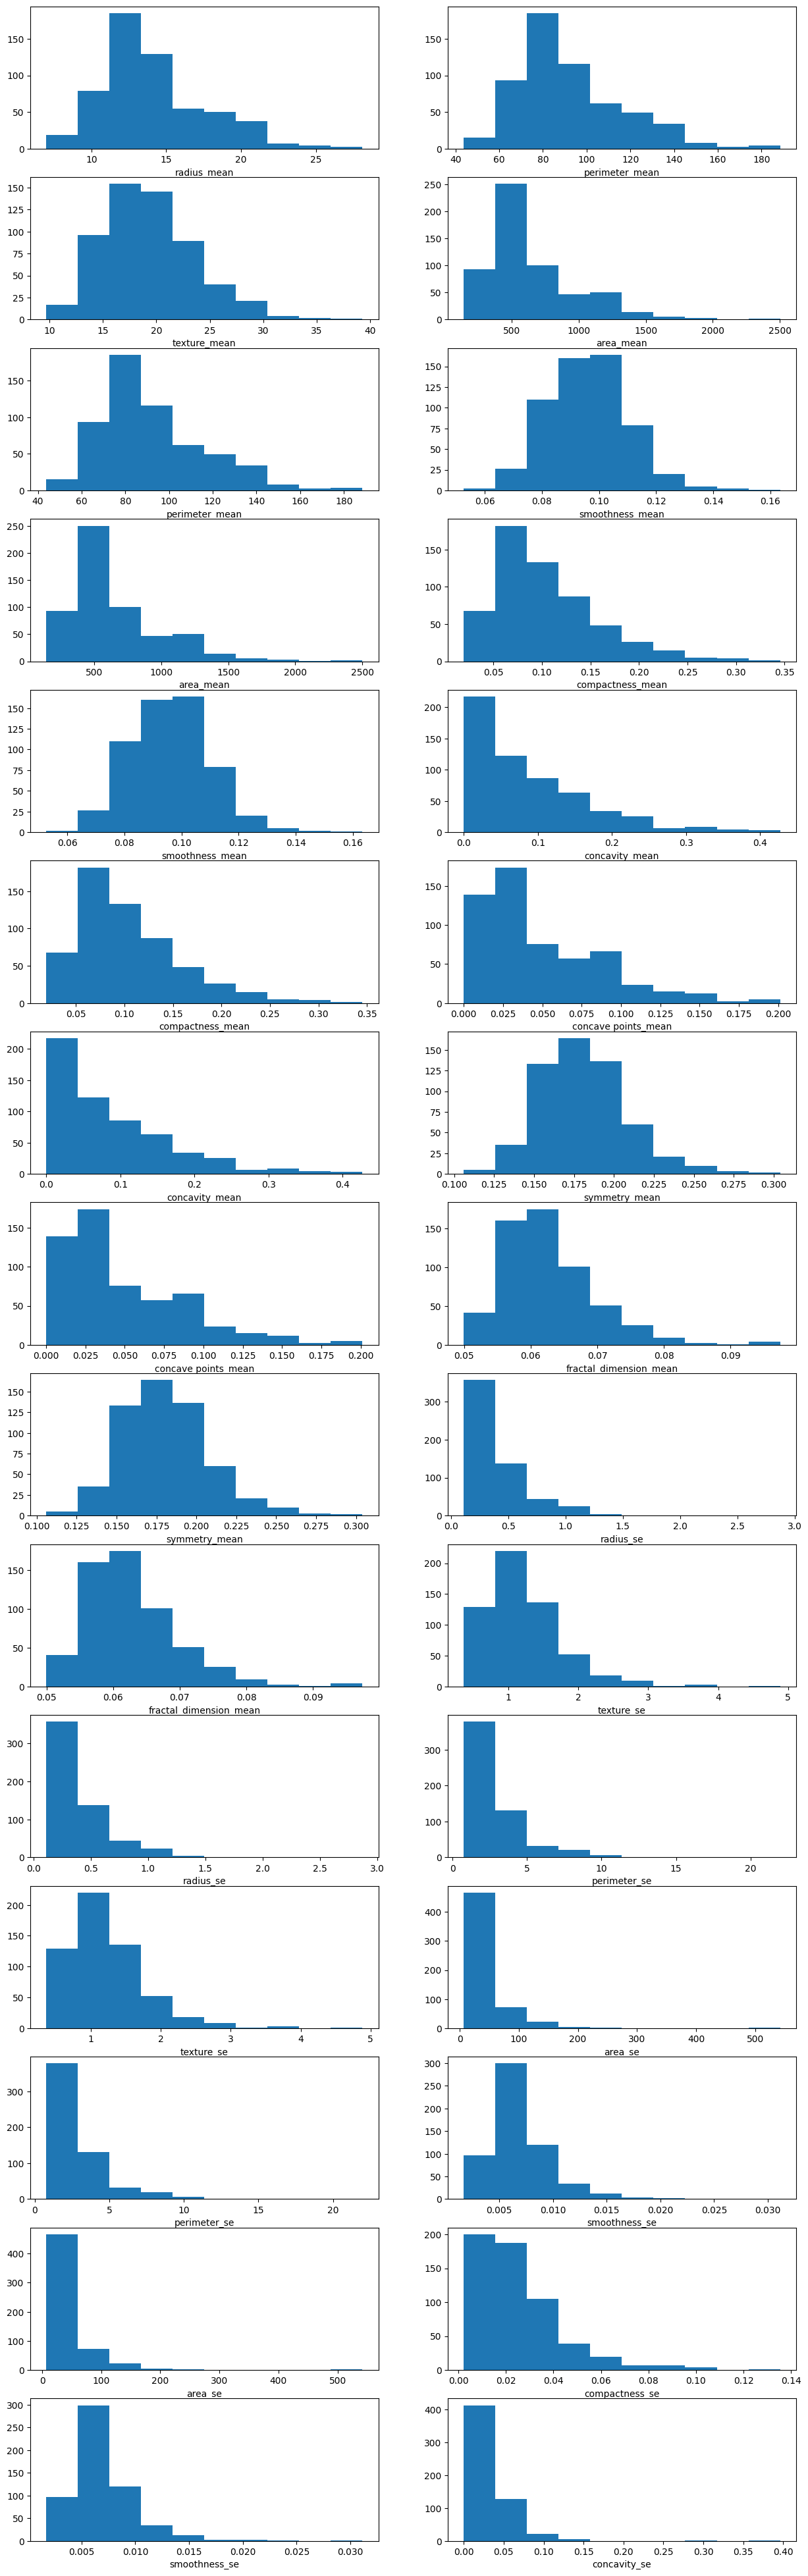

In [116]:
fig, axs = plt.subplots(len(features.columns)//2, 2, figsize=(15, 50))
for i in range(len(features.columns)//2):
    axs[i, 0].hist(features[features.columns[i]])
    axs[i, 0].set_xlabel(features.columns[i])
    axs[i, 1].hist(features[features.columns[i+2]])
    axs[i, 1].set_xlabel(features.columns[i+2])
    

### Train, Validation, and Test Split

In [126]:
X_train, X_valid, y_train, y_valid = train_test_split(
    features, 
    diagnosis, 
    test_size=0.3, 
    stratify=diagnosis['diagnosis']
)

X_valid, X_test, y_valid, y_test = train_test_split(
    X_valid, 
    y_valid, 
    test_size=0.5, 
    stratify=y_valid
)

In [130]:
print(f"X_train, y_train: {len(X_train), len(y_train)}")
print(f"X_valid, y_valid: {len(X_valid), len(y_valid)}")
print(f"X_test, y_test: {len(X_test), len(y_test)}")

X_train, y_train: (398, 398)
X_valid, y_valid: (85, 85)
X_test, y_test: (86, 86)


### Logistic Regression

### The Logistic Function

$$
P(X) = \frac{e^{\beta_{0} + \beta_{1}X_{1} ... + \beta_{n}X_{n}}}{1 + e^{\beta_{0} + \beta_{1}X_{1} + ... + \beta_{n}X_{n}}}
$$

Dividing both side by: $1 - P(x)$

$$
\frac{P(X)}{1-P(X)} = \frac{\frac{e^{\beta_{0} + \beta_{1}X_{1} ... + \beta_{n}X_{n}}}{1 + e^{\beta_{0} + \beta_{1}X_{1} ... + \beta_{n}X_{n}}}}{1 - \frac{e^{\beta_{0} + \beta_{1}X_{1} ... + \beta_{n}X_{n}}}{1 + e^{\beta_{0} + \beta_{1}X_{1} ... + \beta_{n}X_{n}}}}
$$

This expression simplifies to the <b>Log Odds Ratio</b>:

$$
\frac{P(X)}{1-P(X)} = e^{\beta_{0} + \beta_{1}X_{1} ... + \beta_{n}X_{n}}
$$

In [132]:
# fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train['diagnosis'])

LogisticRegression()

In [135]:
validation_predictions = model.predict(X_valid)
test_predictions = model.predict(X_test)

In [140]:
tn, fp, fn, tp = confusion_matrix(
    y_valid['diagnosis'],
    validation_predictions
).ravel()
print("Logistic Regression Validation Results:\n")
print('Accuracy: ', round((tp+tn)/(tp+tn+fp+fn),2))
print('Misclassification Rate: ', round((fp+fn)/(tp+tn+fp+fn),2))
print('True Positive Rate/Recall: ', round((tp)/(tp+fn),2))
print('True Negative Rate/Specificity: ', round((tn)/(tn+fp),2))

Logistic Regression Validation Results:

Accuracy:  0.95
Misclassification Rate:  0.05
True Positive Rate/Recall:  0.94
True Negative Rate/Specificity:  0.96


In [141]:
tn, fp, fn, tp = confusion_matrix(
    y_test['diagnosis'], 
    test_predictions
).ravel()
print("Logistic Regression Test Results:\n")
print('Accuracy: ', round((tp+tn)/(tp+tn+fp+fn),2))
print('Misclassification Rate: ', round((fp+fn)/(tp+tn+fp+fn),2))
print('True Positive Rate/Recall: ', round((tp)/(tp+fn),2))
print('True Negative Rate/Specificity: ', round((tn)/(tn+fp),2))

Logistic Regression Test Results:

Accuracy:  0.91
Misclassification Rate:  0.09
True Positive Rate/Recall:  0.91
True Negative Rate/Specificity:  0.91
